# KNN Classifier on heart disease prediction


In [110]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,precision_score,accuracy_score,roc_auc_score,classification_report,recall_score
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [67]:
heart_dis=pd.read_csv('heart_v2.csv')
heart_dis.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [68]:
heart_dis.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [69]:
heart_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [70]:
heart_dis.shape

(270, 5)

In [71]:
heart_dis.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [72]:
heart_dis['sex']

0      1
1      0
2      1
3      1
4      0
      ..
265    1
266    1
267    0
268    1
269    1
Name: sex, Length: 270, dtype: int64

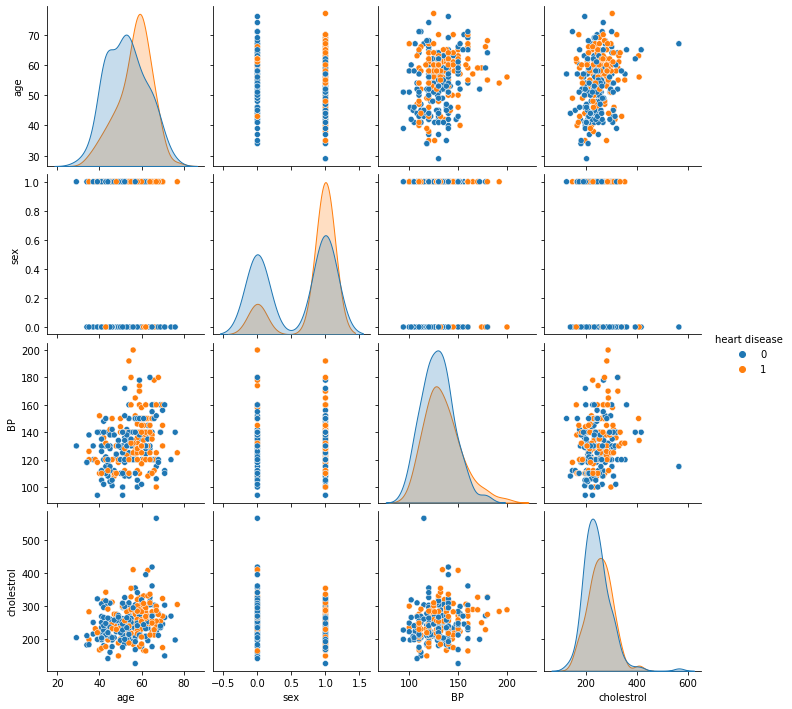

In [73]:
sns.pairplot(data=heart_dis,x_vars=['age','sex','BP','cholestrol'],y_vars=['age','sex','BP','cholestrol'],hue='heart disease')

In [74]:
heart_dis_train,heart_dis_test=train_test_split(heart_dis,train_size=0.7,random_state=42)

In [75]:
heart_dis_train['heart disease'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: heart disease, dtype: float64

In [76]:
heart_dis_y_train=heart_dis_train.pop('heart disease')
heart_dis_y_test=heart_dis_test.pop('heart disease')
heart_dis_x_train=heart_dis_train
heart_dis_x_test=heart_dis_test

In [77]:
print(heart_dis_x_train.shape)
print(heart_dis_y_train.shape)
print(heart_dis_x_test.shape)
print(heart_dis_y_test.shape)

(189, 4)
(189,)
(81, 4)
(81,)


In [78]:
columns_scale=heart_dis_x_train.columns.to_list()
columns_scale

['age', 'sex', 'BP', 'cholestrol']

In [79]:
columns_scale.remove('sex')
columns_scale

['age', 'BP', 'cholestrol']

In [80]:
scale=StandardScaler()
heart_dis_x_train[columns_scale]=scale.fit_transform(heart_dis_x_train[columns_scale])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [81]:
heart_dis_x_train

,age,sex,BP,cholestrol
84,0.246885,1,-1.218091,-0.964008
251,-1.180400,1,-0.101064,-0.620599
92,-0.082489,1,-0.436172,0.276080
201,0.356676,1,-0.380321,0.924741
126,0.795841,1,-0.659578,0.295158
...,...,...,...,...
20,1.344797,1,-0.659578,-0.429816
188,0.795841,0,0.457449,2.718097
71,0.246885,0,-0.659578,1.954967
106,-0.411862,1,-1.776604,-0.563364


In [82]:
heart_dis_x_test[columns_scale]=scale.transform(heart_dis_x_test[columns_scale])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [83]:
heart_dis_x_test

,age,sex,BP,cholestrol
30,0.246885,1,-0.212767,-0.429816
116,-0.960818,1,-0.659578,-0.048251
79,0.137094,1,-0.659578,-0.296268
127,-0.302071,0,0.234044,-1.059399
196,0.356676,0,-1.776604,-0.067329
...,...,...,...,...
55,-1.509774,0,-1.497347,-1.021242
97,0.356676,1,-1.776604,-0.334425
200,1.454588,1,-0.771280,0.485941
38,-1.399983,1,-0.101064,-1.364651


In [84]:
neigh=KNeighborsClassifier(n_neighbors=1,p=2,n_jobs=True)
neigh.fit(heart_dis_x_train,heart_dis_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=True, n_neighbors=1, p=2,
                     weights='uniform')

In [85]:
y_train_pred=neigh.predict(heart_dis_x_train)

In [86]:
accuracy_score(heart_dis_y_train,y_train_pred)

1.0

In [87]:
f1_score(heart_dis_y_train,y_train_pred)

1.0

In [88]:
confusion_matrix(heart_dis_y_train,y_train_pred)

array([[101,   0],
       [  0,  88]])

In [89]:
y_test_pred=neigh.predict(heart_dis_x_test)
accuracy_score(heart_dis_y_test,y_test_pred)

0.5555555555555556

In [90]:
f1_score(heart_dis_y_test,y_test_pred)

0.4375

In [101]:
mean_score=[]
for i in range(1,90):
  neighb=KNeighborsClassifier(n_neighbors=i,p=2,n_jobs=True)
  score=cross_val_score(neighb,heart_dis_x_train,heart_dis_y_train,cv=10)
  mean_score.append(np.mean(score))




In [93]:
len(mean_score)

41

## Determine value of K 

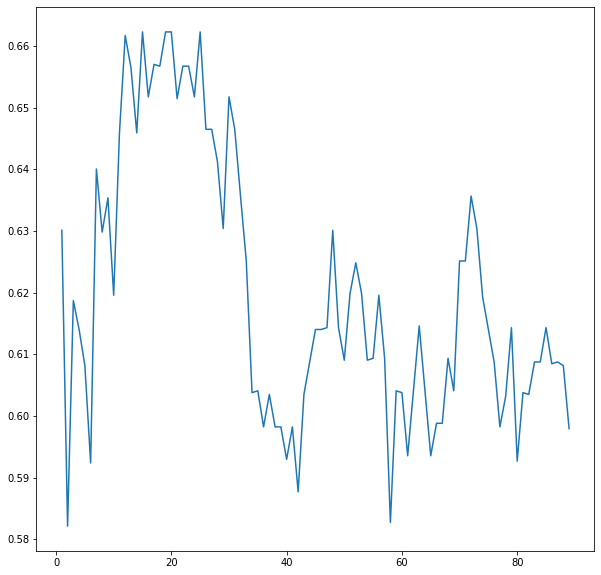

In [102]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1,90)],mean_score)
plt.show()

In [98]:
mean_score_error=[]
for i in range(1,90):
  neighb=KNeighborsClassifier(n_neighbors=i,p=2,n_jobs=True)
  score=cross_val_score(neighb,heart_dis_x_train,heart_dis_y_train,cv=10)
  mean_score_error.append(1-np.mean(score))

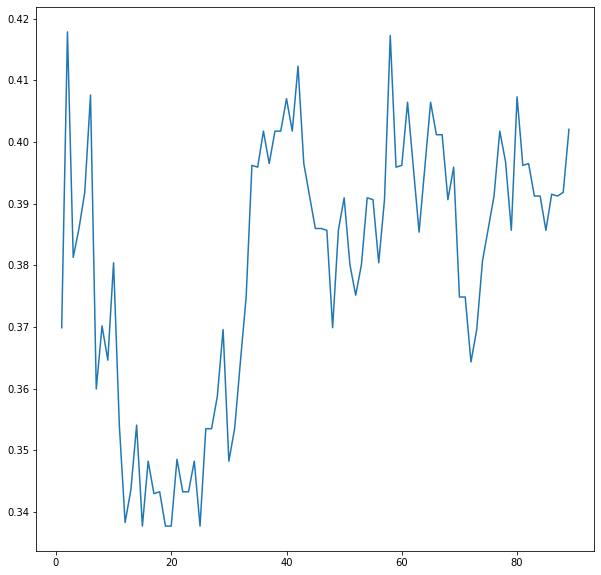

In [100]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1,90)],mean_score_error)
plt.show()

In [104]:
neigh=KNeighborsClassifier(n_neighbors=19,p=2,n_jobs=True)
neigh.fit(heart_dis_x_train,heart_dis_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=True, n_neighbors=19, p=2,
                     weights='uniform')

In [105]:
y_test_pred=neigh.predict(heart_dis_x_test)
accuracy_score(heart_dis_y_test,y_test_pred)

0.6049382716049383

In [108]:
print(classification_report(heart_dis_y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        49
           1       0.50      0.53      0.52        32

    accuracy                           0.60        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.60      0.61        81



In [109]:
confusion_matrix(heart_dis_y_test,y_test_pred)

array([[32, 17],
       [15, 17]])

In [111]:
recall_score(heart_dis_y_test,y_test_pred)

0.53125